In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data[:, [0, 2]], cancer.target

In [19]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.3, random_state=34)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = lg.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Matrix: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.87468671679198
Confusion Matrix: 
 [[118  28]
 [ 22 231]]
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       146
           1       0.89      0.91      0.90       253

    accuracy                           0.87       399
   macro avg       0.87      0.86      0.86       399
weighted avg       0.87      0.87      0.87       399



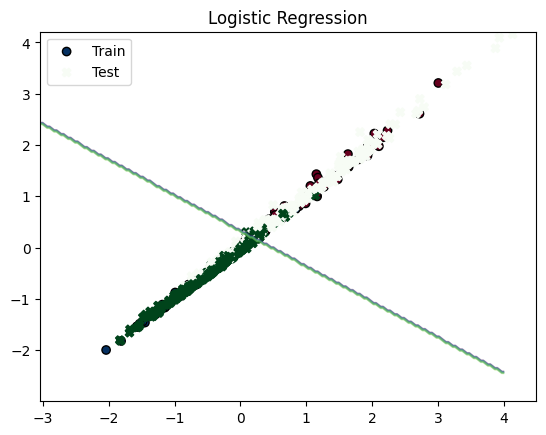

In [15]:
x1_min, x1_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
x2_min, x2_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = lg.predict(grid)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3, cmap = "viridis")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap="RdBu", label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='X', cmap="Greens", label='Test')
plt.title("Logistic Regression")
plt.legend()
plt.show()